In [2]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.decomposition import NMF

In [28]:
df = pd.read_csv('data/total_tweets.csv')

In [46]:
len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'][df['primary_cashtag']=='$SPOM']) / len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'])



<ipython-input-46-1fdde162f564>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'][df['primary_cashtag']=='$SPOM']) / len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'])
<ipython-input-46-1fdde162f564>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'][df['primary_cashtag']=='$SPOM']) / len(df[df['year']==2020][df['screen_name'] == 'AlexDelarge6553'])


0.34270863001993734

In [47]:
df[df['screen_name'] == 'AlexDelarge6553']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,original_index,date,screen_name,tweet,tweet_id,cashtag,hashtag,primary_cashtag,year,month,tokens,Polarity
23464,23464,23464,23464,23464,23464,1.0,2020-11-09 18:50:37,AlexDelarge6553,$hpst!! if you dont know this is the new $rvdo...,1.325873e+18,"['$hpst', '$rvdo', '$hpst']",[],$HPST,2020,11,"['dont', 'know', 'new', 'merger', 'coming', 's...",0.500000
23465,23465,23465,23465,23465,23465,2.0,2020-11-09 01:38:19,AlexDelarge6553,Monday list !1 $spom under radar $spom week2 $...,1.325614e+18,"['$spom', '$spom', '$opti', '$gmpw']",[],$SPOM,2020,11,"['monday', 'list', 'radar', 'week', 'massive',...",0.000000
23466,23466,23466,23466,23466,23466,3.0,2020-11-09 17:42:19,AlexDelarge6553,$tsts massive 1000% gains!!! https://t.co/xTRv...,1.325856e+18,['$tsts'],[],$TSTS,2020,11,"['massive', 'gains']",0.000000
23467,23467,23467,23467,23467,23467,4.0,2020-11-09 18:23:51,AlexDelarge6553,$spom earning coming any day now!! there is a ...,1.325867e+18,['$spom'],[],$SPOM,2020,11,"['earning', 'coming', 'day', 'reason']",0.000000
23468,23468,23468,23468,23468,23468,6.0,2020-11-09 13:39:10,AlexDelarge6553,$gmpw Is the buy!!! Alert!! load the fuck up!!...,1.325795e+18,['$gmpw'],[],$GMPW,2020,11,"['buy', 'alert', 'load', 'fuck', 'new', 'week'...",-0.162879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37638,37638,37638,37638,37638,37638,39.0,2019-11-08 20:54:18,AlexDelarge6553,I would like to say my boasting of the amazing...,1.192908e+18,['$vrus'],[],$VRUS,2019,11,"['like', 'boasting', 'amazing', 'tasting', 'ic...",0.550000
37639,37639,37639,37639,37639,37639,40.0,2019-11-07 20:03:27,AlexDelarge6553,@ROBERTDSCHROED2 I did my part bought 1 millio...,1.192533e+18,['$vrus'],[],$VRUS,2019,11,"['bought', 'million', 'shares', 'today', 'lets...",0.000000
37640,37640,37640,37640,37640,37640,42.0,2019-11-07 17:37:37,AlexDelarge6553,$vrus glad grabbed a extra million shares. 11%...,1.192496e+18,['$vrus'],[],$VRUS,2019,11,"['glad', 'grabbed', 'extra', 'million', 'share...",0.203125
37641,37641,37641,37641,37641,37641,46.0,2019-11-08 17:04:09,AlexDelarge6553,Question any $bynd fans out there. https://t.c...,1.192850e+18,['$bynd'],[],$BYND,2019,11,"['question', 'fans']",0.000000


In [ ]:
4813

In [37]:
len(vocab)

19924

In [24]:
corpus

0        ['break', 'scanner', 'squeeze', 'retailer', 'm...
1                                                       []
2         ['china', 'pennies', 'today', 'upside', 'chart']
3        ['add', 'vol', 'late', 'day', 'chasers', 'comi...
4                                                       []
                               ...                        
92892    ['decent', 'sell', 'dropped', 'price', 'approx...
92893                                                   []
92894    ['beginning', 'push', 'marker', 'dropped', 'pe...
92895    ['sure', 'oil', 'amp', 'energy', 'companies', ...
92896    ['told', 'man', 'energy', 'companies', 'main',...
Name: tokens, Length: 92897, dtype: object

In [26]:
len(word_topic_matrix_df)

19924

In [6]:
corpus = df['tokens'].fillna(value='')
len(corpus)

92897

In [7]:
stop_words = ENGLISH_STOP_WORDS.union(['math'])

In [8]:
tfidf = TfidfVectorizer(stop_words=stop_words)

tweet_word_matrix = tfidf.fit_transform(corpus)

vocab = tfidf.get_feature_names()

In [27]:
len(df)

92897

## NMF

In [11]:
nmf = NMF(n_components=6)

nmf.fit(tweet_word_matrix)

NMF(n_components=6)

#### Tweet/Topic Matrix

In [12]:
tweet_topic_matrix = nmf.transform(tweet_word_matrix)

In [13]:
tweet_topic_matrix_df = pd.DataFrame(tweet_topic_matrix).add_prefix('topic_')

tweet_topic_matrix_df[['raw_tweets', 'clean_tweets', 'username', 'tweet_id']] = df[['tweet', 'tokens', 'screen_name','tweet_id']]
tweet_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,raw_tweets,clean_tweets,username,tweet_id
0,0.0,0.0,0.0,0.002763,0.031824,0.002887,$JAKK $5 break scanner squeeze retailer mania ...,"['break', 'scanner', 'squeeze', 'retailer', 'm...",buysellshort,1.325833e+18
1,0.0,0.0,0.0,0.000000,0.000000,0.000000,$WTER https://t.co/JVc3CjcG3h,[],buysellshort,1.324724e+18
2,0.0,0.0,0.0,0.032559,0.014849,0.000787,$SXTC china pennies on fire today 50% upside o...,"['china', 'pennies', 'today', 'upside', 'chart']",buysellshort,1.324393e+18
3,0.0,0.0,0.0,0.003789,0.030600,0.003233,$SNDL add this vol i see those late day chaser...,"['add', 'vol', 'late', 'day', 'chasers', 'comi...",buysellshort,1.324449e+18
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,$SNDL https://t.co/BJ9oqqY3EO,[],buysellshort,1.324739e+18


#### Word/Topic Matrix

In [14]:
word_topic_matrix_df = pd.DataFrame(nmf.components_, columns=vocab).T.add_prefix('topic_')
word_topic_matrix_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
____,0.0,0.000000,0.0,0.000000,0.000098,0.000000
______,0.0,0.000000,0.0,0.000000,0.000000,0.000000
_______,0.0,0.000000,0.0,0.000015,0.000103,0.000118
__________________________________________,0.0,0.000000,0.0,0.000000,0.000172,0.000000
_curtiscameron,0.0,0.000062,0.0,0.000000,0.000194,0.000000


## Topic Interpretation

#### For topic_0 lets find the tweets that have the highest expression

In [20]:
for tweet in tweet_topic_matrix_df.sort_values(by='topic_1', ascending=False).head(10)['raw_tweets'].values:
    print(tweet)
    print()

https://t.co/UOZoAUU2V2 - Posted a New Watchlist: 12 Hot Stocks To Watch Like $BLFS And $NFEC

https://t.co/D4otdtyLz0 - Posted a New Watchlist: 10 Hot Stocks To Watch Like $AYTU

https://t.co/nnTgYv9q50 - Posted a New Watchlist: 8 Hot Stocks To Watch Like $CYDY

https://t.co/v4hkcFoeFv - Posted a New Watchlist: 12 Hot Stocks To Watch Like $NIHD

https://t.co/YVAbymvxh5 - Posted a New Watchlist: 13 Hot Stocks To Watch Like $CERU And $DFFN

https://t.co/KtfgwX9U72 - Posted a New Watchlist: 15 Hot Stocks To Watch Like $GPMT

https://t.co/OMLNvB8jRJ - Posted a New Watchlist: 17 Hot Stocks To Watch Like $ASTC

https://t.co/RLWLYo8v23 - Posted a New Watchlist: 8 Hot Stocks To Watch Like $KNOS

https://t.co/nuzjCLs70U - Posted a New Watchlist: 13 Hot Stocks To Watch Like $DECN

https://t.co/Zs8GlYMOco - Posted a New Watchlist: 15 Hot Stocks To Watch Like $IEGH



In [12]:
def top_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_tweets)['raw_tweets']
            .values)

In [13]:
for topic in range(0,6):
    terms = list(word_topic_matrix_df.sort_values(by=f'topic_{topic}', ascending=False).head(10).index.values)
    sample_tweet = top_tweets(tweet_topic_matrix_df, f'topic_{topic}', 1)
    print(f'The most popular terms for Topic {topic} are:\n', terms,'\n and a sample tweet is\n', sample_tweet, '\n')

The most popular terms for Topic 0 are:
 ['realtime', 'track', 'alerts', 'record', 'amp', 'profit', 'lists', 'daily', 'watch', 'ago'] 
 and a sample tweet is
 ['https://t.co/lUhx1prjuW $433 profit $EFUT See my track record daily watch lists &amp; realtime alerts: https://t.co/vuP7BD5Yco'] 

The most popular terms for Topic 1 are:
 ['watchlist', 'hot', 'stocks', 'like', 'posted', 'watch', 'new', 'video', 'lesson', 'tomorrow'] 
 and a sample tweet is
 ['https://t.co/UOZoAUU2V2 - Posted a New Watchlist: 12 Hot Stocks To Watch Like $BLFS And $NFEC'] 

The most popular terms for Topic 2 are:
 ['webinar', 'challenge', 'demand', 'new', 'posted', 'lesson', 'video', 'lessons', 'reviewing', 'live'] 
 and a sample tweet is
 ['https://t.co/mRRBr23rJN - Posted a New Webinar: Challenge Webinar 1-21 [On Demand] $MNKD $ZFGN $XLIT'] 

The most popular terms for Topic 3 are:
 ['breakout', 'chart', 'target', 'nice', 'watch', 'break', 'day', 'notes', 'big', 'imo'] 
 and a sample tweet is
 ['$app CHART BRE

<b>Topic 0</b> can best be defined as <b>Self-Marketing.</b><br>
<b>Topic 1</b> can best be defined as <b>Future Movers.</b><br>
<b>Topic 2</b> can best be defined as <b>Free Resources.</b><br>
<b>Topic 3</b> can best be defined as <b>Immediate Stock Alerts.</b><br>
<b>Topic 4</b> can best be defined as <b>Beginner Education(?)</b><br>
<b>Topic 5</b> can best be defined as <b>Personal Action Alert.</b><br>

In [14]:
tweet_topic_matrix_df.groupby('username').mean().iloc[0]

topic_0    0.000435
topic_1    0.001315
topic_2    0.000332
topic_3    0.000483
topic_4    0.015390
topic_5    0.001158
Name: AlexDelarge6553, dtype: float64

In [15]:
topics_by_user = tweet_topic_matrix_df.groupby('username').mean()
topics_by_user = topics_by_user.reset_index()

In [16]:
topics_by_user

,username,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,AlexDelarge6553,0.000435,0.001315,0.000332,0.000483,0.015390,0.001158
1,StockLizardKing,0.000435,0.001171,0.000449,0.001035,0.008233,0.001687
2,alexcutler247,0.001198,0.001117,0.000203,0.000841,0.009800,0.000837
3,buysellshort,0.000811,0.002297,0.000287,0.012176,0.010142,0.008883
4,simbatrading,0.000524,0.001493,0.000213,0.002597,0.012189,0.004472
5,timothysykes,0.010922,0.008857,0.006684,0.000651,0.018907,0.000134


In [17]:
topics_by_user.to_csv('files_1.csv')
visualization = pd.read_csv('data/files.csv')

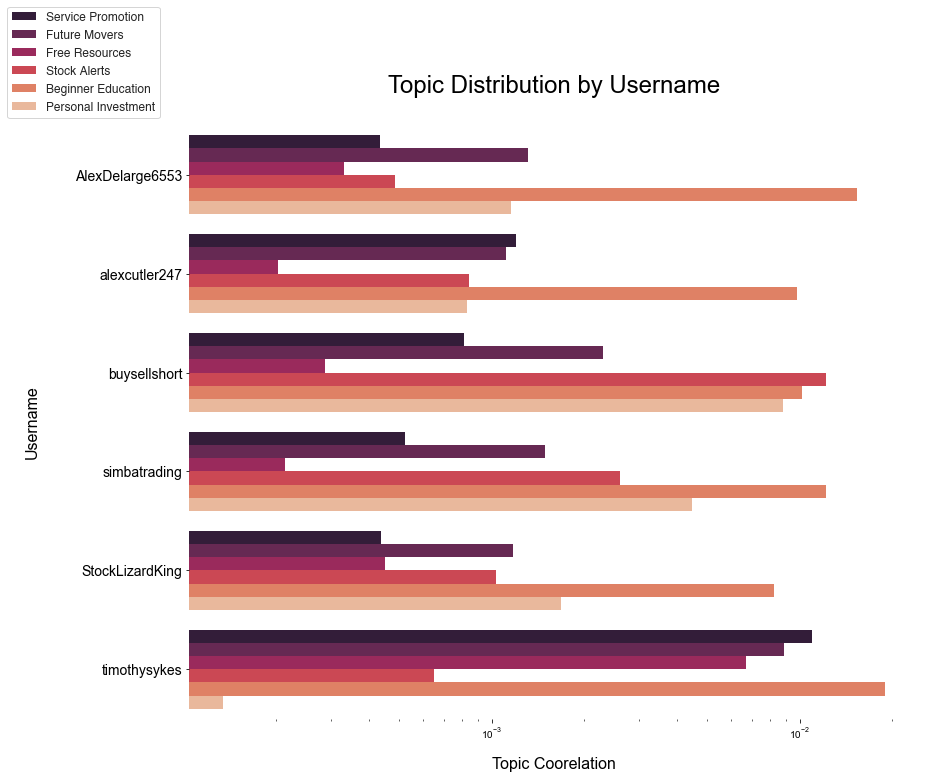

In [18]:
fig, ax = plt.subplots(figsize=(13,11))


ax = sns.barplot(x='value', y='username', hue='topic', data=visualization, palette = 'rocket', orient='h')
sns.set_theme(font='Helvetica')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
ax.set_xscale('log')
ax.set_title('\nTopic Distribution by Username\n', fontsize = 24)
ax.set_ylabel('Username', fontsize=16, rotation=90, labelpad=35)
ax.set_xlabel('Topic Coorelation', fontsize=16, rotation=0, labelpad=15)
plt.yticks(fontsize=14)
legend = plt.legend(bbox_to_anchor=(-.25, 1.2), loc=2, borderaxespad=0, fontsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
frame = legend.get_frame()
frame.set_facecolor('white')

plt.tight_layout()

plt.savefig(f'images/topic_by_username');

Topic 0 can best be defined as Self-Marketing.
Topic 1 can best be defined as Future Movers.
Topic 2 can best be defined as Free Resources.
Topic 3 can best be defined as Immediate Stock Alerts.
Topic 4 can best be defined as Beginner Education(?)
Topic 5 can best be defined as Personal Action Alert.

In [16]:
def top_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_tweets)['raw_tweets']
            .values)

def random_tweets(tweet_topic_matrix_df, topic, n_tweets):
    return (tweet_topic_matrix_df[tweet_topic_matrix_df[topic]>.001]
            .sample(n_tweets)['raw_tweets']
            .values)

def top_words(word_topic_matrix_df, topic, n_words):
    return (word_topic_matrix_df
            .sort_values(by=topic, ascending=False)
            .head(n_words))[topic]

In [40]:
for tweet in random_tweets(tweet_topic_matrix_df, 'topic_5', 100):
    print(tweet)
    print()

my last post on $BSDM for awhile the 350k buyer at .25 last week knows something imo...avg joe investor doesn't pony up $90k in the .20's

$CLSH this pr was the tell-tale sign back on June 7. Insiders took shares at .25 when it was trading at .10 https://t.co/0uyeArUHHs

$DARA blowin up - $GTXI ph 2 peer

$FCEL bouncer play buy the beaten down plays for easy gains next few days imo

added $GSAT 1.36

https://t.co/NH7ds9gELK One more time $WWR

@MrZackMorris $DCAR 1/3 float of $BURG Gonna be a 🚀

@dragonfirestock $ASUV pullback from .27 highs yesterday is on 80k shares now...low floater 101

$PUGE gonna be huge imo gonna make today's $CHIT trade look like child's play

$ESCR chart 25-50% on this 32c break  http://t.co/WqI4MeoJ2L

$SCOK - low float coal stock bullish positive MACD cross triggered http://t.co/innoXvGXUw

$DPTR small oil stock looks ready to explode to $1's

Who dont like $jada!! https://t.co/GacesBvKhO

$NURO got foot in door with Walmart pretty big imo bottom chart loade

In [39]:
top_words(word_topic_matrix_df, 'topic_5', 25)

added       4.096760
bounce      0.408371
run         0.280919
target      0.254680
imo         0.197885
break       0.162104
dip         0.158227
bio         0.148155
vol         0.137328
area        0.130947
avg         0.130883
low         0.115604
shares      0.097260
position    0.095769
lookin      0.092815
big         0.082621
float       0.072761
targets     0.071858
pop         0.068521
play        0.063530
chart       0.059391
like        0.058208
week        0.054769
coming      0.053830
mkt         0.053764
Name: topic_5, dtype: float64

Topic 1 is emojiness

In [78]:
top_words(word_topic_matrix_df, 'topic_2', 10)

webinar      3.817822
challenge    1.954101
demand       1.936385
new          1.707057
posted       1.699948
lesson       0.337854
video        0.325091
lessons      0.065764
reviewing    0.060501
live         0.056401
Name: topic_2, dtype: float64

Topic 2 I will do your hw for money topic